<a href="https://colab.research.google.com/github/cindy840823/Portfolio/blob/main/Lazada_Product_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
# load the data
lazada_df = pd.read_csv("/content/sample_data/health_and_wellness_cleaned_20230810_213000 2.csv")

In [6]:
# clean the price column
lazada_df['Price_clean'] = lazada_df['Price'].str.replace("฿", "",
                                                          regex=False).str.replace(",", "",
                                                                                   regex=False).astype(float)
lazada_df.head()

,Id,Section,Name,Price,Total Sold,Total Reviews,Shop Location,Price_clean
0,4799179886,Acne Care,DHC Vitamin B-Mix วิตามินบีรวม (สำหรับ 20 วัน),฿75.00,NaN,NaN,Pathum Thani,75.0
1,4795171651,Acne Care,ซิงค์ Vistra Zinc วิสทร้า ซิงค์ 15 มก. ขนาด 20...,฿79.00,NaN,NaN,Chiang Mai,79.0
2,4790242641,Acne Care,Blackmores แบลคมอร์ส Bio Zinc A Chelate (90 T...,฿224.00,NaN,NaN,Surin,224.0
3,4789940606,Acne Care,1แถม1 กลูต้าวิตมี กลูต้าส้มเลือด Gluta With Me...,฿290.00,NaN,NaN,Udon Thani,290.0
4,4787161067,Acne Care,🎌 DHC Vitamin B-Mix Persistent วิตามินบีรวม แบ...,฿149.00,NaN,NaN,Bangkok,149.0


In [7]:
# clean Total Sold & Total Reviews
def extract_number(text):
    match = re.search(r'\d+', str(text))
    return int(match.group()) if match else 0

lazada_df['Total_Sold_Clean'] = lazada_df['Total Sold'].apply(extract_number)
lazada_df['Total_Reviews_Clean'] = lazada_df['Total Reviews'].apply(extract_number)

<ipython-input-8-f6e6e4e9c820>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_section.values, y=avg_price_by_section.index, palette="mako")


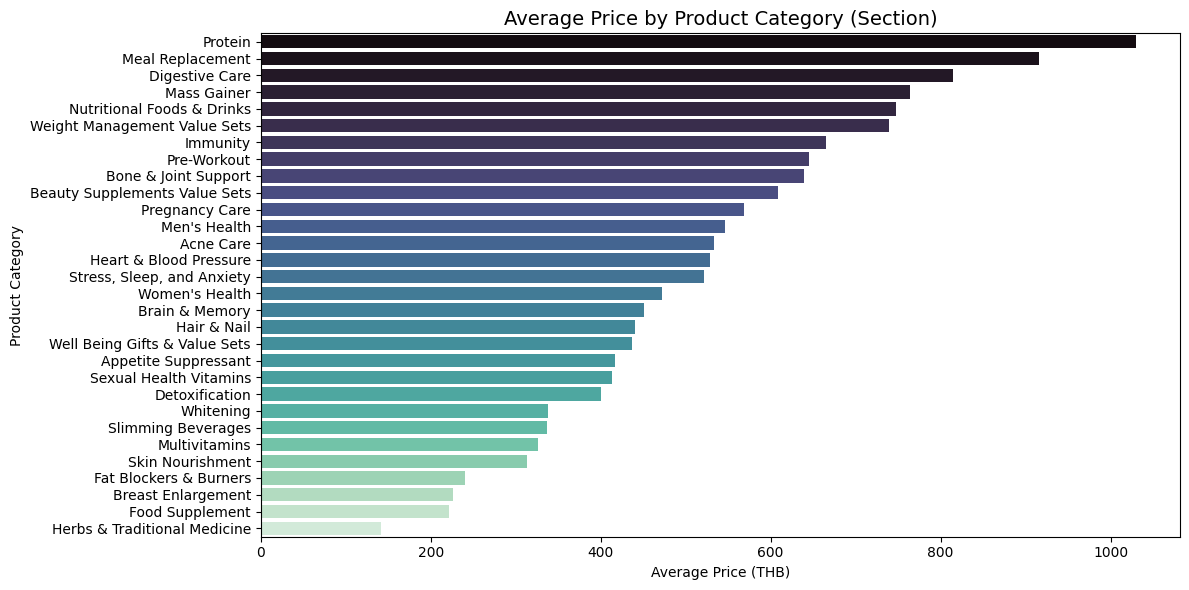

In [8]:
# plot average price by product category
avg_price_by_section = (
    lazada_df.groupby("Section")["Price_clean"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_section.values, y=avg_price_by_section.index, palette="mako")
plt.title("Average Price by Product Category (Section)", fontsize=14)
plt.xlabel("Average Price (THB)")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

<ipython-input-9-f3cc65a8e5be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sections["Total_Sold_Clean"], y=top_sections.index, palette="rocket")


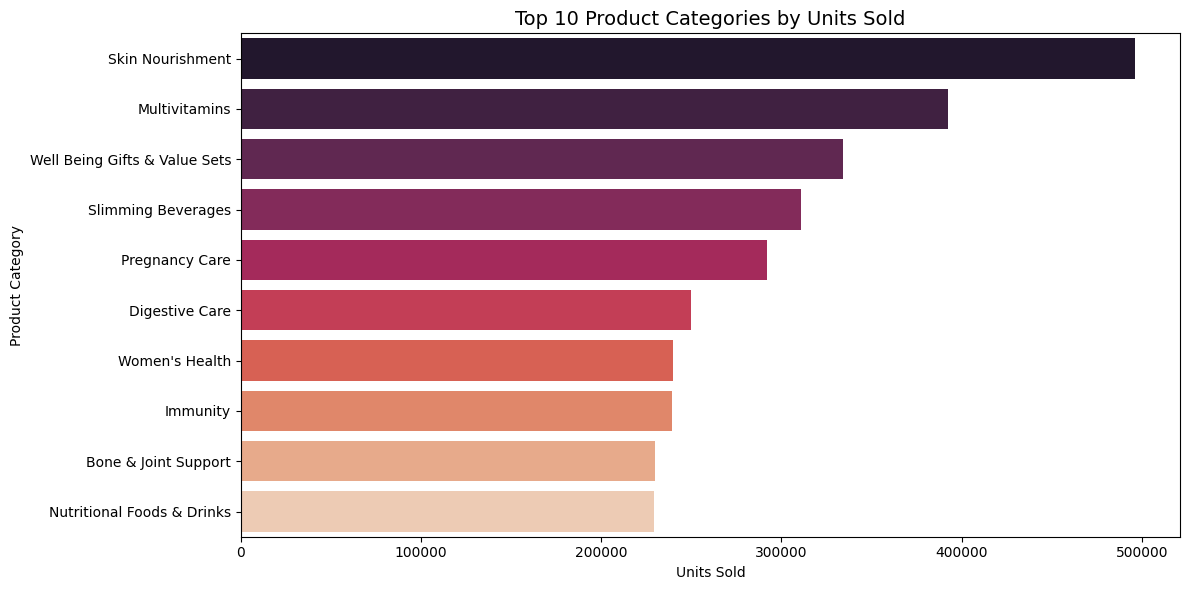

In [9]:
# plot top 10 product categories by units sold
section_stats = lazada_df.groupby("Section")[["Total_Sold_Clean", "Total_Reviews_Clean"]].sum().sort_values(by="Total_Sold_Clean", ascending=False)
top_sections = section_stats.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_sections["Total_Sold_Clean"], y=top_sections.index, palette="rocket")
plt.title("Top 10 Product Categories by Units Sold", fontsize=14)
plt.xlabel("Units Sold")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

<ipython-input-10-36f38fe0bd35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="crest")


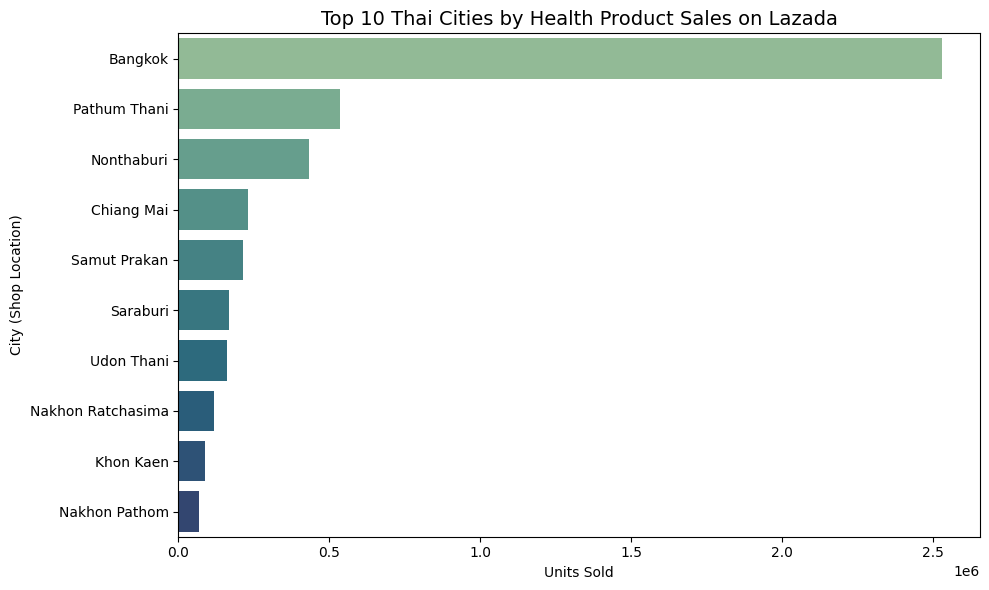

In [10]:
# plot top 10 cities by health product sales
city_sales = lazada_df.groupby("Shop Location")["Total_Sold_Clean"].sum().sort_values(ascending=False)
top_cities = city_sales.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="crest")
plt.title("Top 10 Thai Cities by Health Product Sales on Lazada", fontsize=14)
plt.xlabel("Units Sold")
plt.ylabel("City (Shop Location)")
plt.tight_layout()
plt.show()

In [17]:
# top 10 most sold products
top_products = lazada_df.sort_values(by="Total_Sold_Clean", ascending=False).head(10)

top_products_display = top_products[[
    "Name", "Section", "Total_Sold_Clean", "Price_clean", "Shop Location"
]].reset_index(drop=True)

top_products_display

,Name,Section,Total_Sold_Clean,Price_clean,Shop Location
0,เพชรสังฆาต ตราอภัยภูเบศร (10 แคปซูล /แผง),Herbs & Traditional Medicine,993,24.0,Bangkok
1,เพชรสังฆาต ตราอภัยภูเบศร (10 แคปซูล /แผง),Herbs & Traditional Medicine,993,24.0,Bangkok
2,เพชรสังฆาต ตราอภัยภูเบศร (10 แคปซูล /แผง),Herbs & Traditional Medicine,993,24.0,Bangkok
3,เพชรสังฆาต ตราอภัยภูเบศร (10 แคปซูล /แผง),Herbs & Traditional Medicine,993,24.0,Bangkok
4,เพชรสังฆาต ตราอภัยภูเบศร (10 แคปซูล /แผง),Herbs & Traditional Medicine,993,24.0,Bangkok
5,เพชรสังฆาต ตราอภัยภูเบศร (10 แคปซูล /แผง),Herbs & Traditional Medicine,993,24.0,Bangkok
6,เพชรสังฆาต ตราอภัยภูเบศร (10 แคปซูล /แผง),Herbs & Traditional Medicine,993,24.0,Bangkok
7,เพชรสังฆาต ตราอภัยภูเบศร (10 แคปซูล /แผง),Herbs & Traditional Medicine,993,24.0,Bangkok
8,เพชรสังฆาต ตราอภัยภูเบศร (10 แคปซูล /แผง),Herbs & Traditional Medicine,993,24.0,Bangkok
9,เพชรสังฆาต ตราอภัยภูเบศร (10 แคปซูล /แผง),Herbs & Traditional Medicine,993,24.0,Bangkok


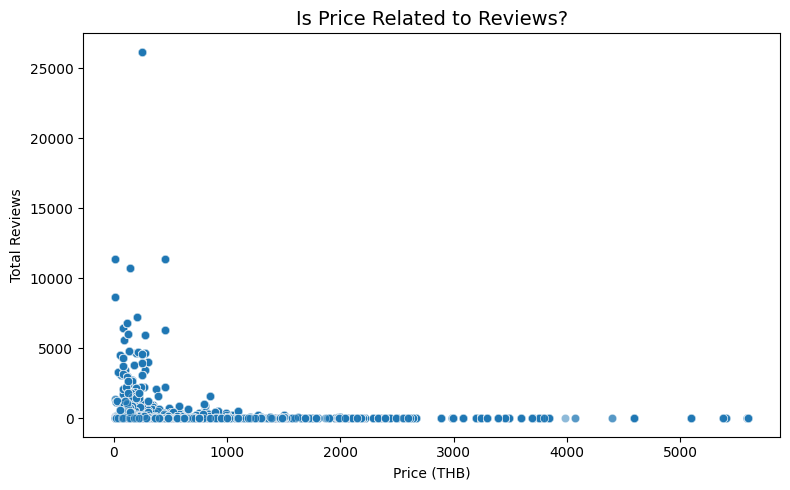

In [12]:
# price vs. reviews correlation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=lazada_df, x="Price_clean", y="Total_Reviews_Clean", alpha=0.5)
plt.title("Is Price Related to Reviews?", fontsize=14)
plt.xlabel("Price (THB)")
plt.ylabel("Total Reviews")
plt.tight_layout()
plt.show()

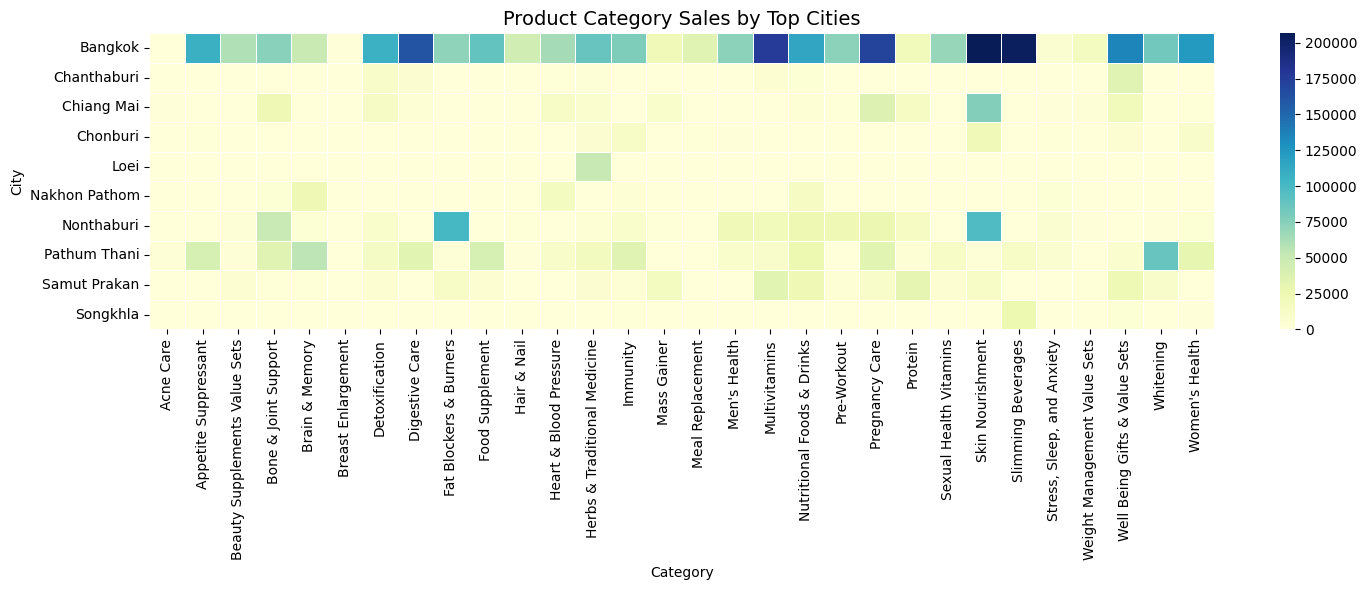

In [16]:
# pivot table: City vs Product Category
heatmap_data = lazada_df.pivot_table(
    index="Shop Location",
    columns="Section",
    values="Total_Sold_Clean",
    aggfunc="sum",
    fill_value=0)

# show top 10 cities only
top_city_names = lazada_df['Shop Location'].value_counts().head(10).index
heatmap_trimmed = heatmap_data.loc[heatmap_data.index.isin(top_city_names)]

# plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_trimmed, cmap="YlGnBu", annot=False, linewidths=0.5)
plt.title("Product Category Sales by Top Cities", fontsize=14)
plt.xlabel("Category")
plt.ylabel("City")
plt.tight_layout()
plt.show()